In [308]:
%load_ext watermark
%watermark -a "Romell D.Z." -u -d -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Romell D.Z. 
last updated: 2018-12-07 

numpy 1.15.4
pandas 0.23.4
matplotlib 2.2.2
sklearn 0.20.0


# 1. Supervised Learning

In [309]:
import warnings
warnings.simplefilter('ignore' )

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6) 
# plt.rcParams['axes.titlesize'] = 40
# plt.rcParams['axes.labelsize'] = 25
# plt.rcParams['xtick.labelsize'] = 15
# plt.rcParams['ytick.labelsize'] = 15
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from __future__ import division

In [310]:
df_global = pd.read_csv('global_metrics.csv')
print('Columns into dataFrame:')
print(df_global.columns)
df_global = df_global.iloc[:,1:]

Columns into dataFrame:
Index(['Unnamed: 0', 'poblacion', 'fertilidad', 'VIH', 'CO2', 'IMC_hombres',
       'GDP', 'IMC_mujeres', 'esperanza_vida', 'mortalidad_infantil',
       'region'],
      dtype='object')


## Variables description of Global Statistic

In [311]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
poblacion              100 non-null float64
fertilidad             100 non-null float64
VIH                    100 non-null float64
CO2                    100 non-null float64
IMC_hombres            100 non-null float64
GDP                    100 non-null float64
IMC_mujeres            100 non-null float64
esperanza_vida         100 non-null float64
mortalidad_infantil    100 non-null float64
region                 100 non-null object
dtypes: float64(9), object(1)
memory usage: 7.9+ KB


## Descriptive statistics

In [312]:
df_global.describe().T.iloc[:,1:]

,mean,std,min,25%,50%,75%,max
poblacion,4.023559e+07,1.340227e+08,234457.23,3.219080e+06,8926670.020,2.322755e+07,1.273247e+09
fertilidad,2.714300e+00,1.461026e+00,1.00,1.487500e+00,2.180,3.920000e+00,7.310000e+00
VIH,1.659000e+00,3.389880e+00,0.04,1.000000e-01,0.445,1.310000e+00,2.300000e+01
CO2,3.269000e+00,4.257969e+00,0.01,3.450000e-01,1.595,4.590000e+00,2.366000e+01
IMC_hombres,2.219090e+01,3.613695e+00,15.10,1.900750e+01,22.475,2.491750e+01,2.952000e+01
GDP,1.298642e+04,1.437682e+04,463.87,2.362365e+03,7230.235,1.751293e+04,6.650070e+04
IMC_mujeres,1.159531e+02,1.546900e+01,84.01,1.063575e+02,117.455,1.283375e+02,1.420100e+02
esperanza_vida,6.187010e+01,1.136096e+01,37.67,5.425500e+01,61.840,6.919250e+01,8.801000e+01
mortalidad_infantil,4.281090e+01,4.096852e+01,2.17,8.892500e+00,23.745,7.223250e+01,1.562900e+02


## Descriptive analysis about hope of life

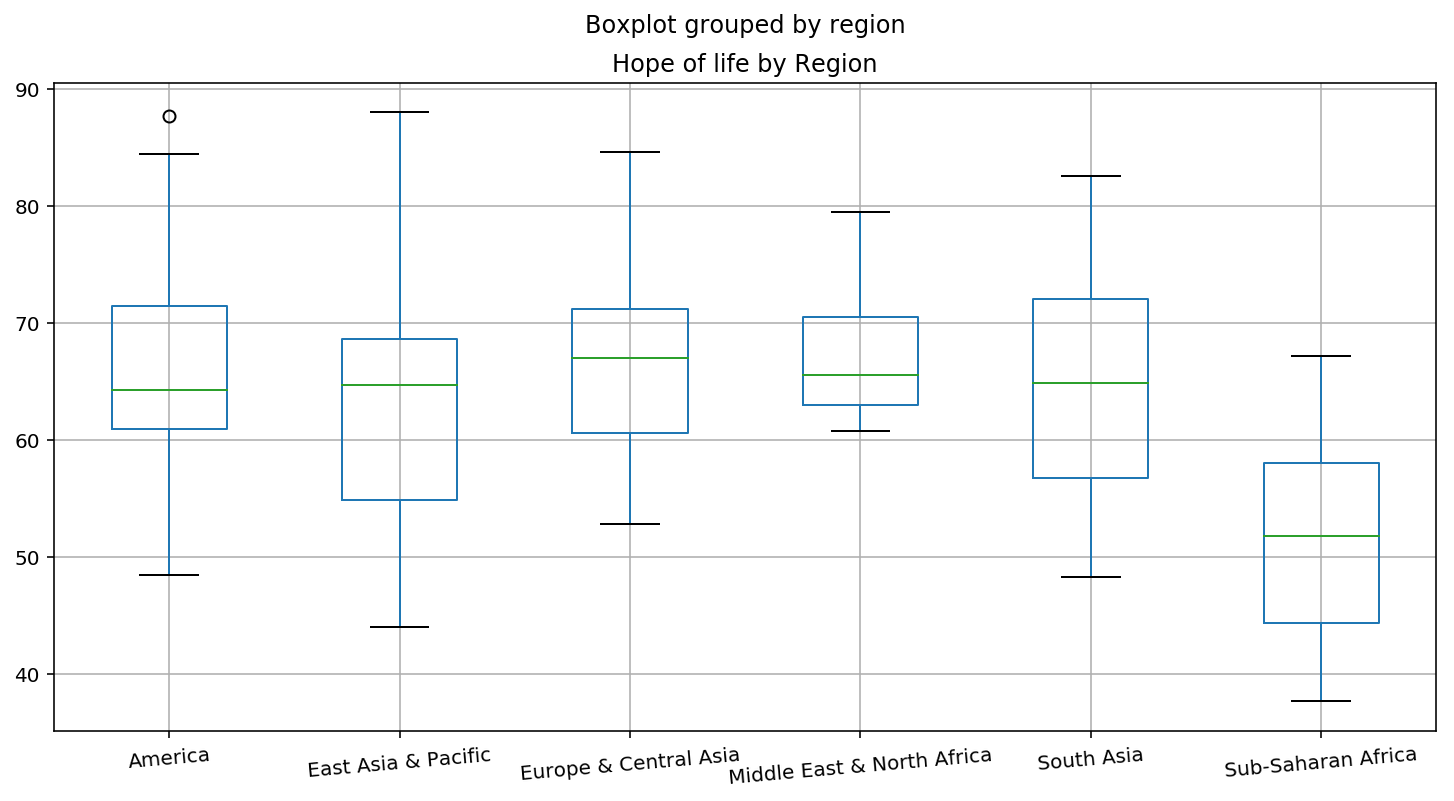

In [313]:
ax = df_global.boxplot('esperanza_vida',by='region',rot=5)
plt.title('Hope of life by Region',);plt.xlabel('');plt.ylabel('')
plt.savefig('snapshot/global_hope_rate',bbox_inches='tight',dpi=100);

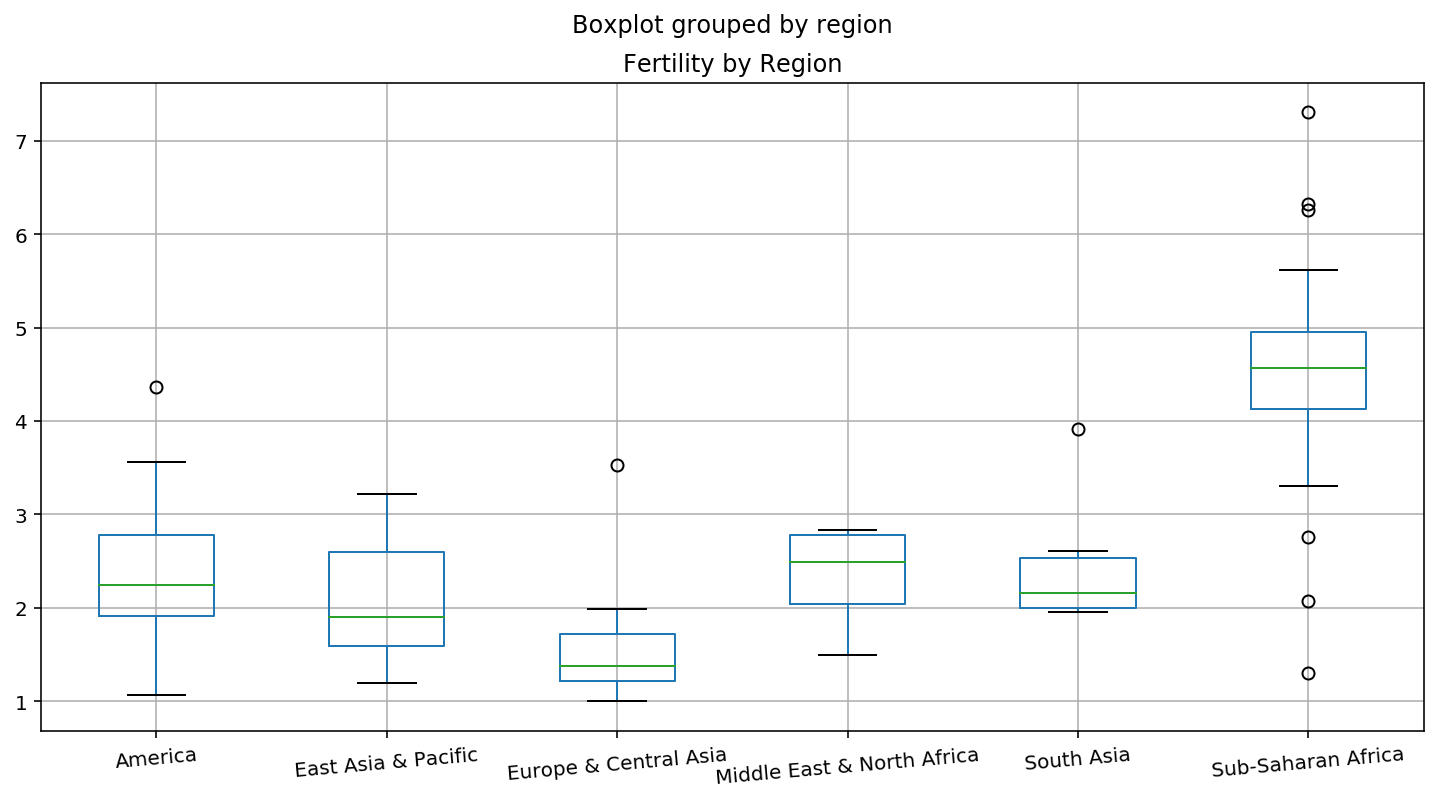

In [314]:
df_global.boxplot('fertilidad','region',rot=5,)
plt.title('Fertility by Region',);plt.xlabel('');plt.ylabel('')
plt.savefig('snapshot/global_fertility_rate',bbox_inches='tight',dpi=100);

In [315]:
y = df_global['esperanza_vida'].values
X = df_global['fertilidad'].values
X.shape,y.shape

((100,), (100,))

In [316]:
X,y = X.reshape(-1,1), y.reshape(-1,1)
X.shape,y.shape

((100, 1), (100, 1))

Text(0,0.5,'Esperanza de Vida')

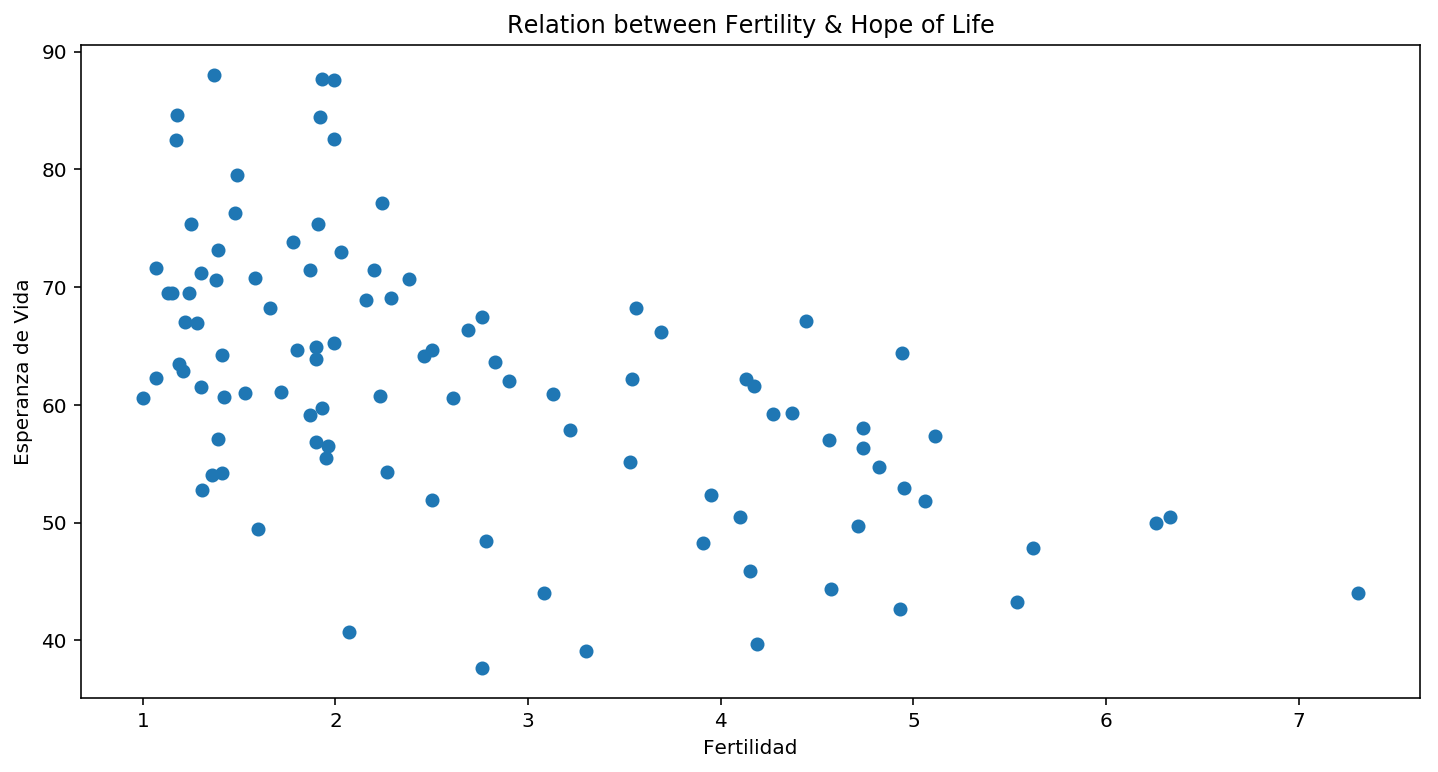

In [317]:
# plot the relation between variables
plt.scatter(X,y)
plt.title('Relation between Fertility & Hope of Life')
plt.xlabel('Fertilidad')
plt.ylabel('Esperanza de Vida')

The R score: 0.30367885240457204
Slope -4.2851 & Intercept: 73.5012


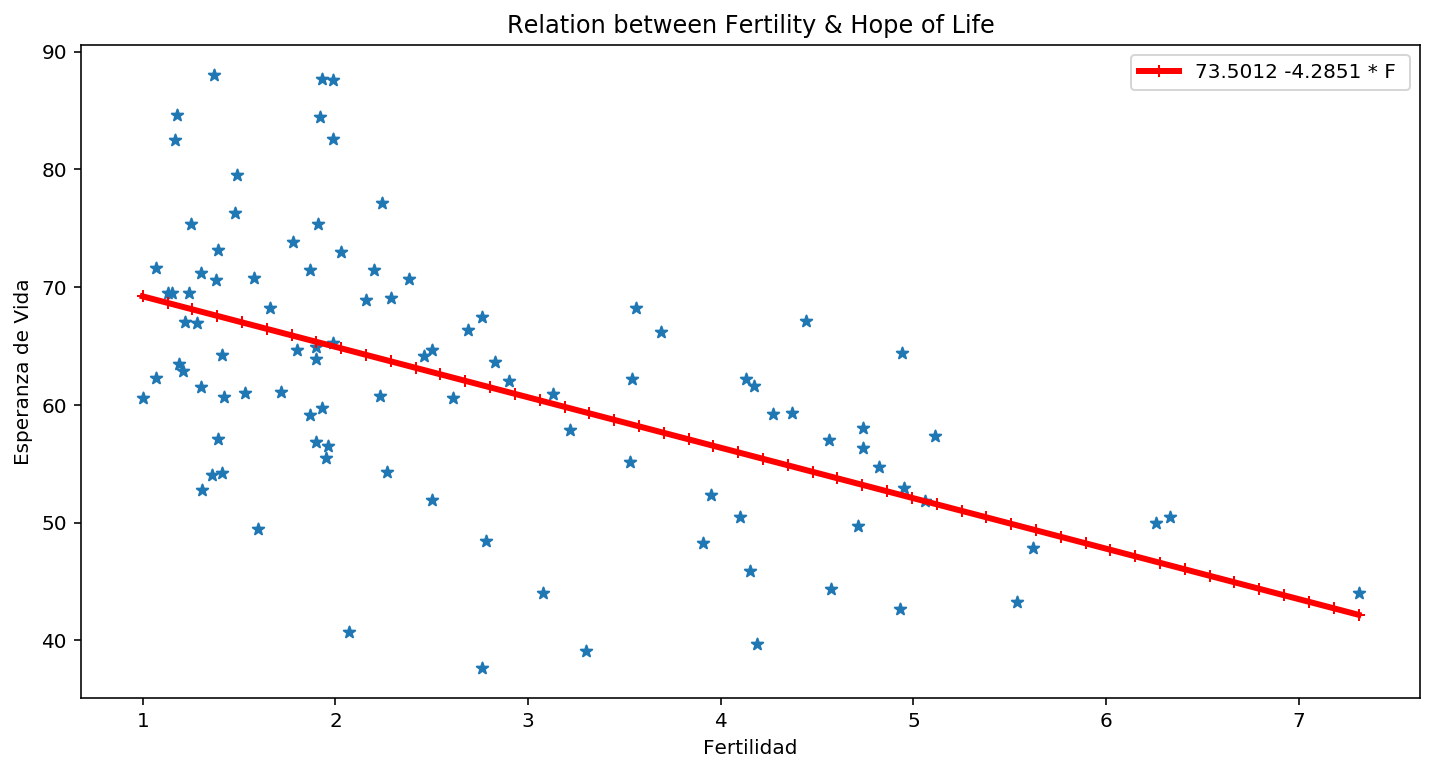

In [318]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)
# Train with all
reg.fit(X,y)
y_pred = reg.predict(prediction_space)

print('The R score:',reg.score(X, y)) # R^2
print('Slope %.4f & Intercept: %.4f' % (reg.coef_[0][0],reg.intercept_[0]))

plt.scatter(X, y,marker='*')
plt.plot(prediction_space, y_pred,marker='+', color='red', linewidth=3)
plt.legend(['%.4f %.4f * F ' % (reg.intercept_[0],reg.coef_[0][0])])
plt.margins(.05)
plt.title('Relation between Fertility & Hope of Life')
plt.xlabel('Fertilidad')
plt.ylabel('Esperanza de Vida')
plt.savefig('snapshot/global_fertility_hopelife',bbox_inches='tight',dpi=100);

In [319]:
X = df_global.drop(['fertilidad','region'],axis=1)
y = df_global['fertilidad']

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

print("R^2: %.4f" % reg.score(X_test, y_test))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %.4f" % rmse )

R^2: 0.6236
RMSE: 0.7118


In [320]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg,X,y,cv=7)
print('Cross valuation scores using 7-Fold:\n',cv_scores)
print("Average 7-Fold CV Score using cross validation: %.4f"%np.mean(cv_scores))

Cross valuation scores using 7-Fold:
 [0.58892122 0.60139874 0.5236406  0.8660213  0.86728489 0.63416002
 0.72316838]
Average 7-Fold CV Score using cross validation: 0.6864


In [321]:
print("Average 10-Fold CV Score using cross validation %.4f" % np.mean(cross_val_score(reg,X,y,cv=10)))

Average 10-Fold CV Score using cross validation 0.4719


In [322]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3)
scores = cross_val_score(reg, X, y, cv=cv)
print('Cross valuation scores using 10-ShuffleSplitFold:\n',cv_scores)
print('Accuary: %0.2f (+/- %.3f)' %(scores.mean(),scores.std()))

Cross valuation scores using 10-ShuffleSplitFold:
 [0.58892122 0.60139874 0.5236406  0.8660213  0.86728489 0.63416002
 0.72316838]
Accuary: 0.73 (+/- 0.127)


In [323]:
cv = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_val_score(reg, X, y, cv=cv)
print('Cross valuation scores using 5-ShuffleSplitFold:\n',cv_scores)
print('Accuary: %0.2f (+/- %.3f)' %(scores.mean(),scores.std()))

Cross valuation scores using 5-ShuffleSplitFold:
 [0.58892122 0.60139874 0.5236406  0.8660213  0.86728489 0.63416002
 0.72316838]
Accuary: 0.63 (+/- 0.136)


In [324]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),reg)
scores = cross_val_score(clf, X, y, cv=cv,scoring='r2')
print('Cross valuation scores using StandarScale into pipline:\n',cv_scores)
print('Accuary with f1_macro: %0.2f (+/- %.3f)' %(scores.mean(),scores.std()))

Cross valuation scores using StandarScale into pipline:
 [0.58892122 0.60139874 0.5236406  0.8660213  0.86728489 0.63416002
 0.72316838]
Accuary with f1_macro: 0.76 (+/- 0.075)


In [325]:
# dropping hope of life
X = df_global.drop(['esperanza_vida','region'],axis=1)
y = df_global['esperanza_vida'].values
df_columns = df_global.drop(['esperanza_vida','region'], axis=1).columns

Lasso Regresion with alpha .4:
  [-0.         -0.         -0.26842248  0.          0.          0.
 -0.         -0.06018599]
Lasso Regresion with alpha .2:
  [-0.00000000e+00 -3.88439184e-01 -7.03494875e-01  0.00000000e+00
  0.00000000e+00  8.82781759e-05 -0.00000000e+00 -6.36624830e-02]


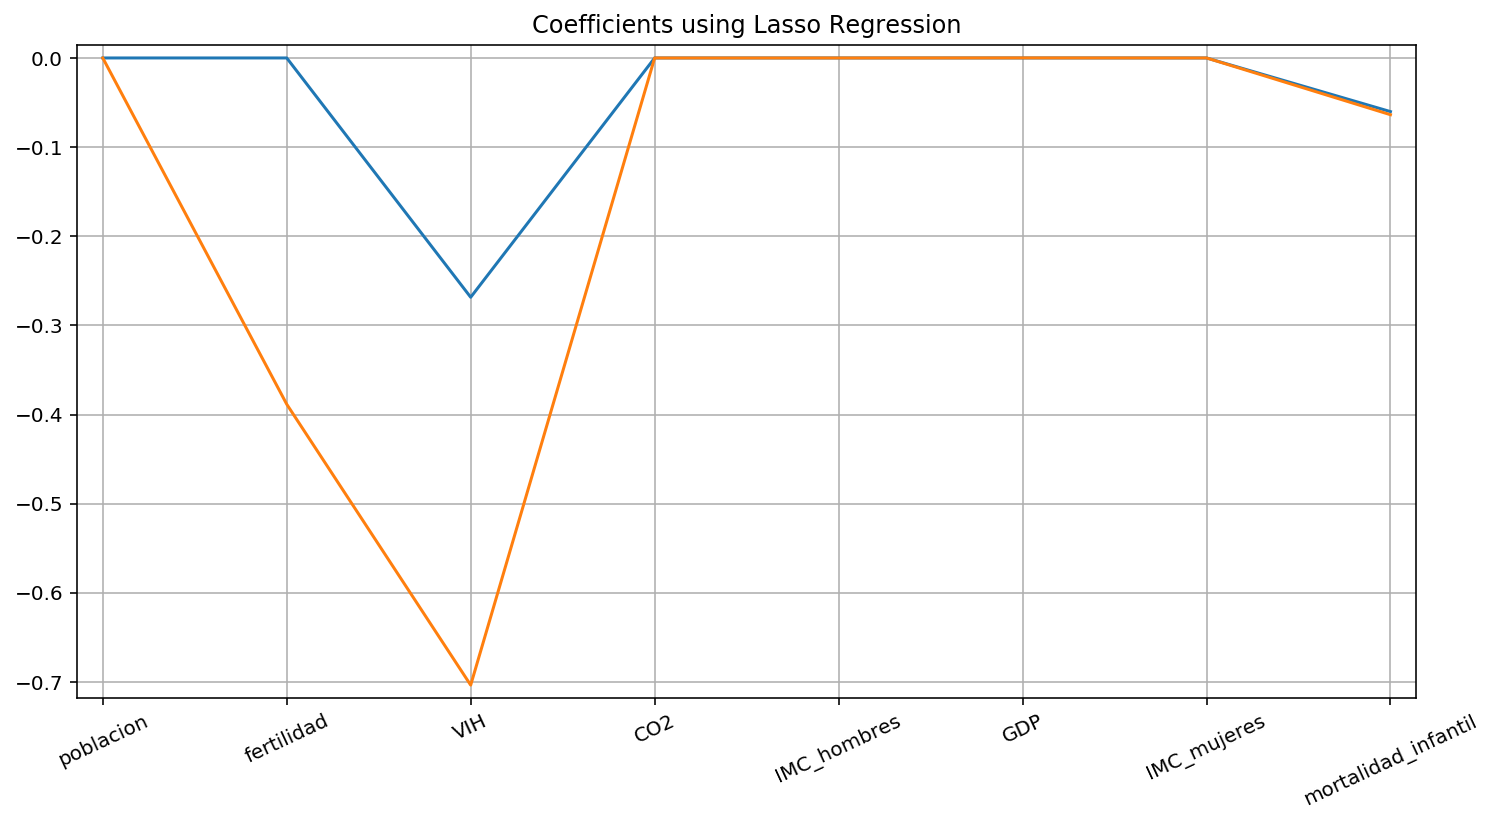

In [326]:
from sklearn.linear_model import Lasso

lasso4 = Lasso(alpha=0.4,normalize=True)
lasso4.fit(X,y)
print("Lasso Regresion with alpha .4:\n ",lasso4.coef_)

lasso2 = Lasso(alpha=0.2,normalize=True)
lasso2.fit(X,y)
print("Lasso Regresion with alpha .2:\n ",lasso2.coef_)

x_axis = range(len(X.columns))
# Plot the coefficients
plt.plot(x_axis, lasso4.coef_)
plt.plot(x_axis, lasso2.coef_)
plt.xticks(x_axis, X.columns.values, rotation=25)
plt.grid(True)
plt.margins(0.02)
plt.title('Coefficients using Lasso Regression')
plt.savefig('snapshot/global_lasso_regression',bbox_inches='tight',dpi=100);
plt.show()

In [327]:
def plotRidgeRegressionScores(alpha_space,cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores - std_error, cv_scores + std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_ylim([0,0.5])
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

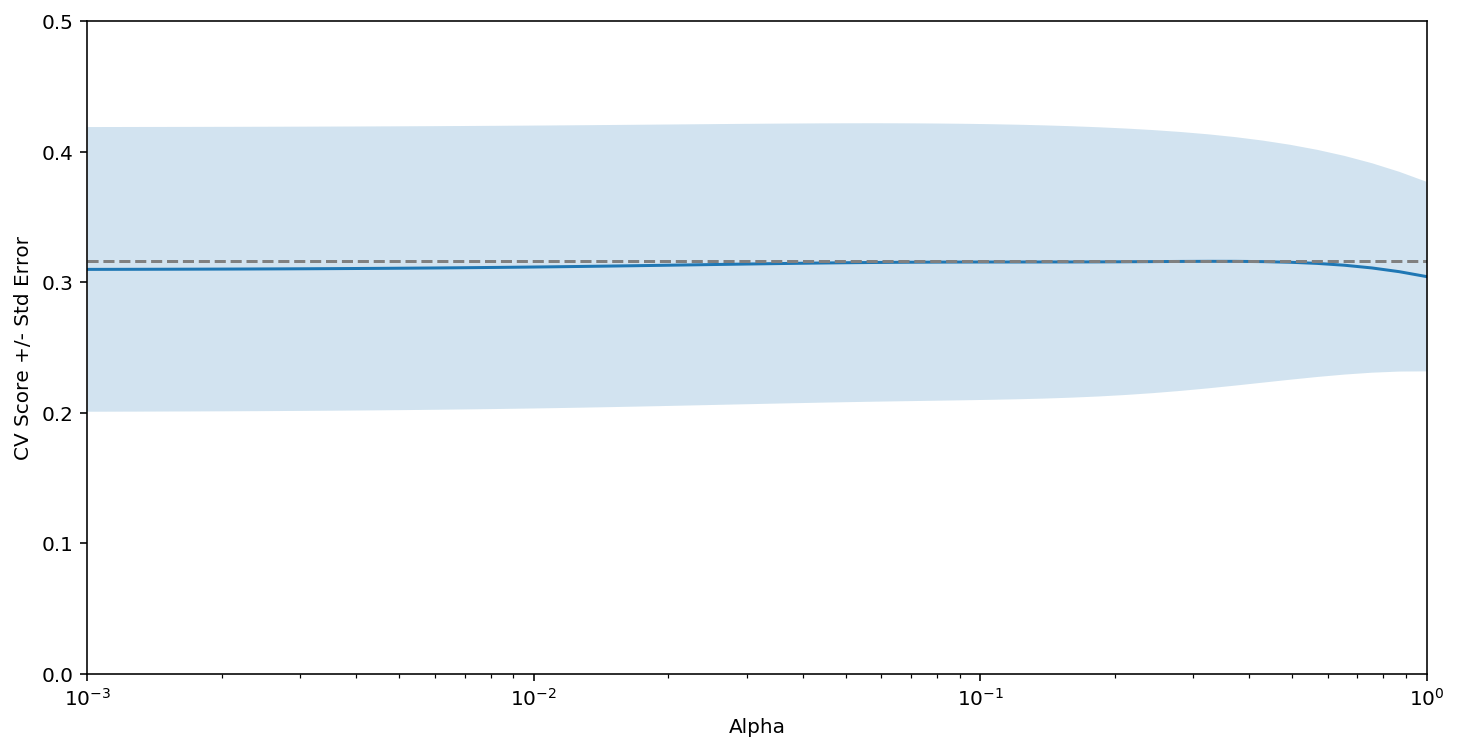

In [328]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-3, 0, 50)
ridge_reg_scores = []
ridge_reg_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_reg_cv_scores = cross_val_score(ridge,X,y,cv=5)
    ridge_reg_scores.append(np.mean(ridge_reg_cv_scores))
    ridge_reg_scores_std.append(np.std(ridge_reg_cv_scores))

plotRidgeRegressionScores(alpha_space,ridge_reg_scores, ridge_reg_scores_std)

In [329]:
diabetes = pd.read_csv('diabetes.csv').iloc[:,1:]
X = diabetes.drop(['diabetes'], axis=1)
y = diabetes['diabetes']
X.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age'],
      dtype='object')

In [330]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('K-Neighboors Classifier score: ',knn.score(X_test,y_test))
print('Callasification Report: \n',classification_report(y_test, y_pred,target_names=['No has Diabetes','Has Diabetes']))

K-Neighboors Classifier score:  0.6933333333333334
Callasification Report: 
                  precision    recall  f1-score   support

No has Diabetes       0.70      0.90      0.79        48
   Has Diabetes       0.64      0.33      0.44        27

      micro avg       0.69      0.69      0.69        75
      macro avg       0.67      0.61      0.61        75
   weighted avg       0.68      0.69      0.66        75



In [331]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

print('K-Neighboors Classifier score: ',knn.score(X_test,y_test))
print('Callasification Report: \n',classification_report(y_test, y_pred,target_names=['No has Diabetes','Has Diabetes']))

K-Neighboors Classifier score:  0.72
Callasification Report: 
                  precision    recall  f1-score   support

No has Diabetes       0.74      0.88      0.80        49
   Has Diabetes       0.65      0.42      0.51        26

      micro avg       0.72      0.72      0.72        75
      macro avg       0.69      0.65      0.66        75
   weighted avg       0.71      0.72      0.70        75



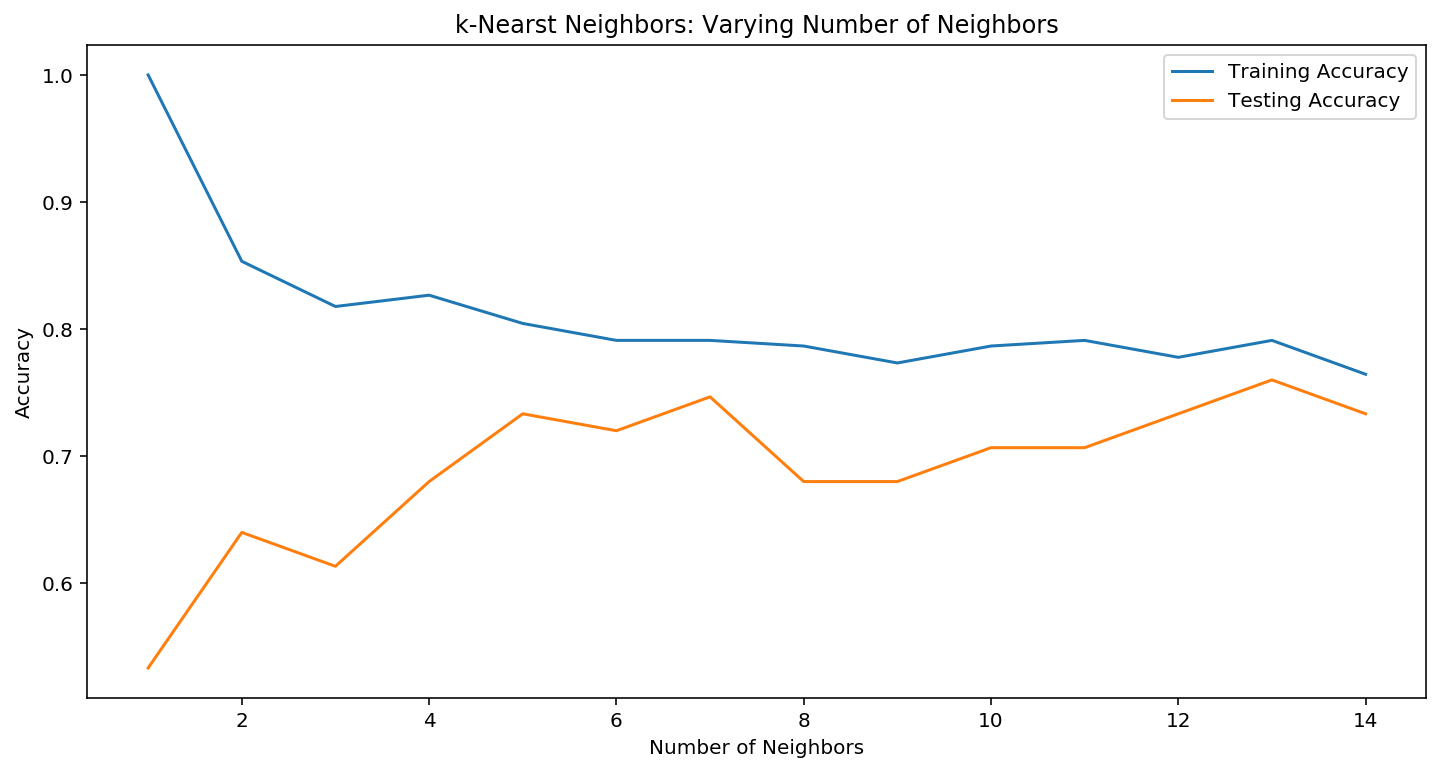

In [332]:
neighbors = np.arange(1, 15)
train = np.empty(len(neighbors))
test = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train[i] = knn.score(X_train, y_train)
    test[i] = knn.score(X_test, y_test)

plt.title('k-Nearst Neighbors: Varying Number of Neighbors')
plt.plot(neighbors, train, label = 'Training Accuracy')
plt.plot(neighbors, test, label = 'Testing Accuracy')
plt.legend(loc='best')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.savefig('snapshot/global_varying_knn_numbers',bbox_inches='tight',dpi=100);

### Best Neighbors k is 5

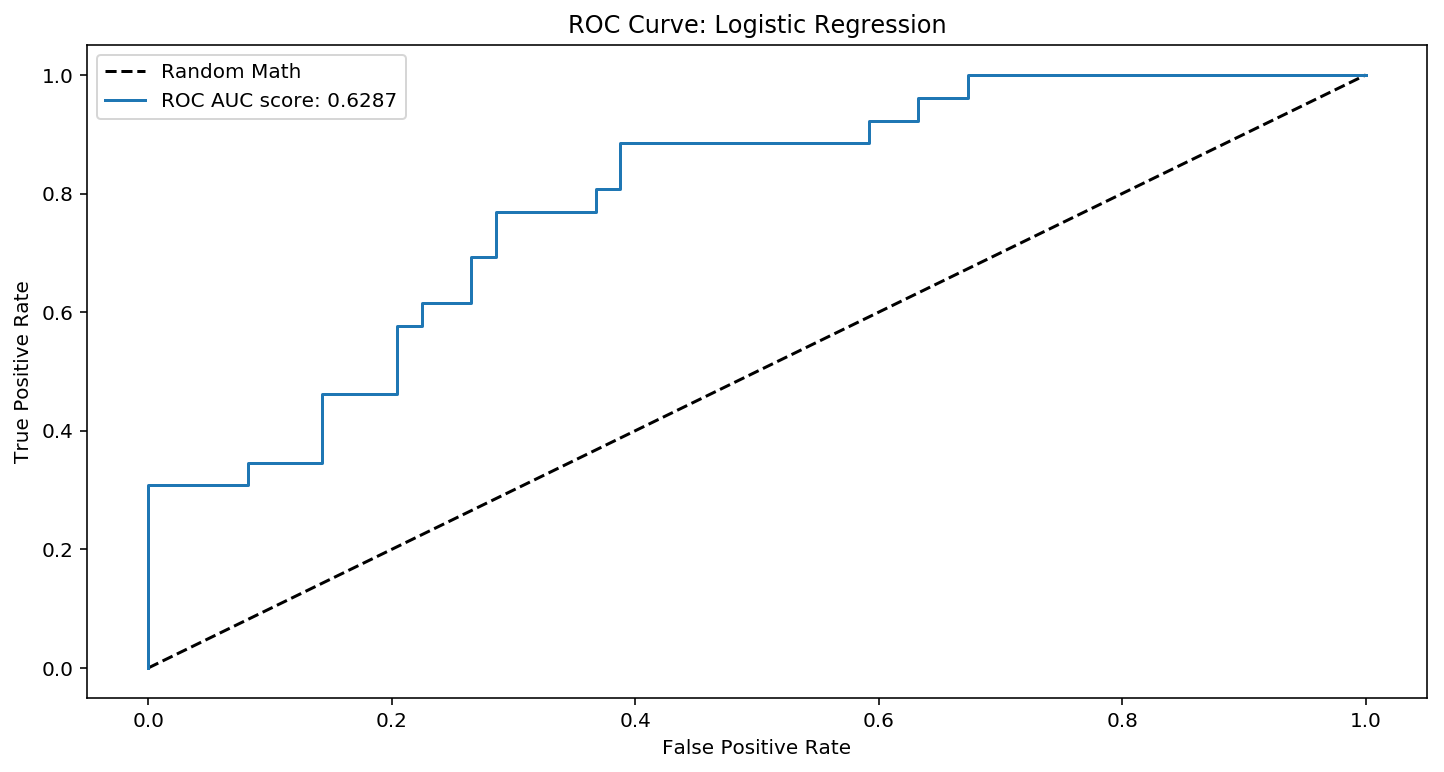

In [333]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Random Math','ROC AUC score: %.4f'%roc_auc_score(y_test,y_pred)])
plt.title('ROC Curve: Logistic Regression')
plt.savefig('snapshot/global_roc_logistic_regression',bbox_inches='tight',dpi=100);

In [334]:
cv_auc = cross_val_score(logreg,X,y,cv=10,scoring='roc_auc')

print("MEAN of AUC for 10-fold: %.4f" % np.mean(cv_auc))

MEAN of AUC for 10-fold: 0.8057


In [335]:
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space,'penalty':['l1','l2']}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train,y_train)
y_pred = logreg_cv.predict(X_test)
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]
r2 = logreg_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Logistic Regression best Parameters: %s"%logreg_cv.best_params_)
print("Best score %.4f" % logreg_cv.best_score_)
print("Logistic Regression R squared: {}".format(r2))
print("Logistic Regression MSE: {}".format(mse))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

Logistic Regression best Parameters: {'C': 3.727593720314938, 'penalty': 'l1'}
Best score 0.7733
Logistic Regression R squared: 0.76
Logistic Regression MSE: 0.24
AUC: 0.8445839874411303


In [336]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3,5,7, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X_train,y_train)
y_pred = tree_cv.predict(X_test)
y_pred_prob = tree_cv.predict_proba(X_test)[:,1]
r2 = tree_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Decision Tree best parameters: %s"%tree_cv.best_params_)
print("Best score %.4f"%tree_cv.best_score_)
print("DecisionTreeClassifier R squared: {}".format(r2))
print("DecisionTreeClassifier MSE: {}".format(mse))
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

Decision Tree best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 8}
Best score 0.7378
DecisionTreeClassifier R squared: 0.7333333333333333
DecisionTreeClassifier MSE: 0.26666666666666666
AUC: 0.8002354788069075


In [337]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
l1_space = np.linspace(-1, 1, 30)
param_grid = {'l1_ratio': l1_space}

elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train,y_train)

y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print("Tuned ElasticNet best params: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet best params: {'l1_ratio': -0.034482758620689724}
Tuned ElasticNet R squared: 0.3075692585231943
Tuned ElasticNet MSE: 0.15682786926959116


In [338]:
df_global_dummy = pd.get_dummies(df_global,drop_first=True) # bye bye region_America
df_global_dummy.columns

Index(['poblacion', 'fertilidad', 'VIH', 'CO2', 'IMC_hombres', 'GDP',
       'IMC_mujeres', 'esperanza_vida', 'mortalidad_infantil',
       'region_East Asia & Pacific', 'region_Europe & Central Asia',
       'region_Middle East & North Africa', 'region_South Asia',
       'region_Sub-Saharan Africa'],
      dtype='object')

In [339]:
# if region_America is selected:
df_global_dummy.iloc[2:3,-5:] # dummy variables has zero

,region_East Asia & Pacific,region_Europe & Central Asia,region_Middle East & North Africa,region_South Asia,region_Sub-Saharan Africa
2,0,0,0,0,0


In [340]:
X = df_global_dummy.drop('fertilidad',axis=1)
y = df_global_dummy[['fertilidad']]
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5,normalize=True)
ridge_cv = cross_val_score(ridge,X,y,cv=5)
print(ridge_cv)
print(np.mean(ridge_cv))

[0.61589574 0.83313581 0.83750226 0.78407656 0.73092812]
0.7603076976619751


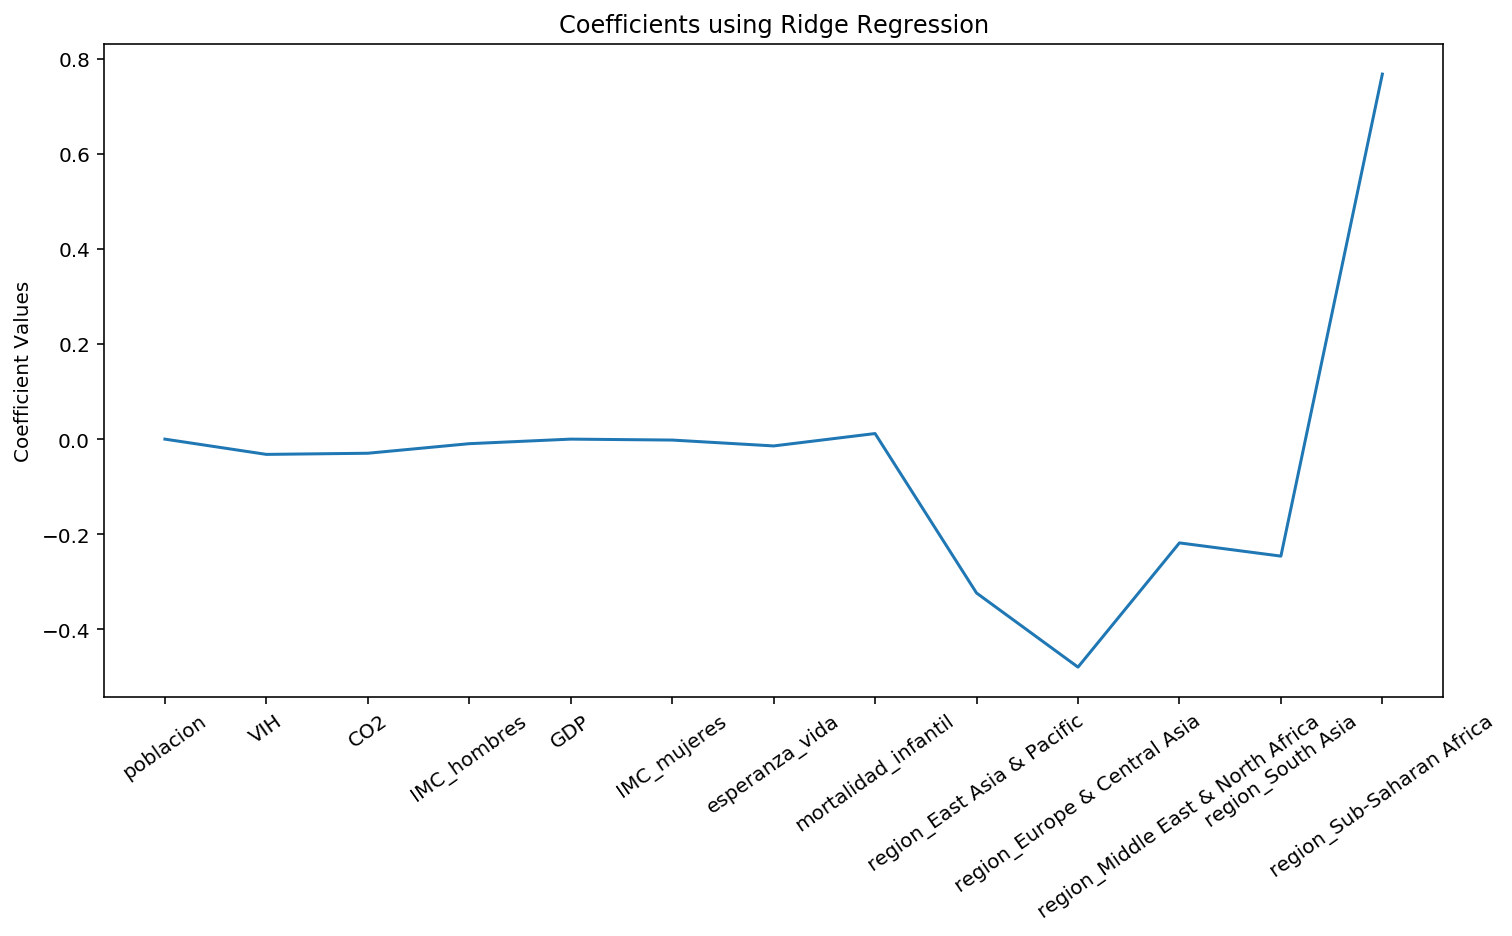

In [341]:
ridge.fit(X,y)
plt.plot(range(len(ridge.coef_[0])),ridge.coef_[0])
plt.xticks(range(len(ridge.coef_[0])),X.columns,rotation=35)
plt.ylabel('Coefficient Values')
plt.title('Coefficients using Ridge Regression')
plt.savefig('snapshot/global_ridge_regression',bbox_inches='tight',dpi=100);

In [342]:
X = diabetes.drop(['diabetes'], axis=1)
y = diabetes['diabetes']

In [343]:
for i in range(30):
    idx = np.random.choice(np.arange(len(X)),1)
    idy = np.random.choice(np.arange(len(X.columns[:-1])),1)
    X.iloc[idx,idy] = np.nan
    
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
pregnancies    295 non-null float64
glucose        295 non-null float64
diastolic      298 non-null float64
triceps        295 non-null float64
insulin        295 non-null float64
bmi            298 non-null float64
dpf            294 non-null float64
age            300 non-null int64
dtypes: float64(7), int64(1)
memory usage: 18.8 KB


In [344]:
X.isnull().sum()

pregnancies    5
glucose        5
diastolic      2
triceps        5
insulin        5
bmi            2
dpf            6
age            0
dtype: int64

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y)

In [346]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

X_clean = pd.DataFrame(imp.fit_transform(X),columns=X.columns)

In [347]:
print('Are there any value null o fail value?')
X_clean.isnull().sum()

Are there any value null o fail value?


pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
dtype: int64

In [348]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
svm = SVC(probability=True)

steps = [('imputer', imp), ('SVM', svm)]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_svm = pipeline.predict_proba(X_test)[:,1]

print('classification report:\n',classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        59
           1       0.00      0.00      0.00        31

   micro avg       0.66      0.66      0.66        90
   macro avg       0.33      0.50      0.40        90
weighted avg       0.43      0.66      0.52        90

ROC AUC: 0.5000


In [349]:
steps = [('imputer', imp), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_knn = pipeline.predict_proba(X_test)[:,1]

print('classification report:\n',classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78        59
           1       0.58      0.45      0.51        31

   micro avg       0.70      0.70      0.70        90
   macro avg       0.66      0.64      0.65        90
weighted avg       0.69      0.70      0.69        90

ROC AUC: 0.6411


In [350]:
steps = [('imputer', imp), ('knn', LogisticRegression())]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_lgr = pipeline.predict_proba(X_test)[:,1]

print('classification report:\n',classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        59
           1       0.74      0.55      0.63        31

   micro avg       0.78      0.78      0.78        90
   macro avg       0.77      0.72      0.74        90
weighted avg       0.77      0.78      0.77        90

ROC AUC: 0.7233


In [351]:
steps = [('imputer', imp), ('knn', DecisionTreeClassifier(max_depth=5))]
pipeline = Pipeline(steps)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
y_pred_prob_dtc = pipeline.predict_proba(X_test)[:,1]

print('classification report:\n',classification_report(y_test, y_pred))
print("ROC AUC: %.4f"%roc_auc_score(y_test,y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73        59
           1       0.46      0.42      0.44        31

   micro avg       0.63      0.63      0.63        90
   macro avg       0.59      0.58      0.58        90
weighted avg       0.63      0.63      0.63        90

ROC AUC: 0.5826


In [352]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=5))])
knn_standar_scale = pipeline.fit(X_train,y_train)
y_pred = knn_standar_scale.predict(X_test)
y_pred_prob_knn_ss = knn_standar_scale.predict_proba(X_test)[:,1]

print('classification report:\n',classification_report(y_test, y_pred))
print('KNN with 5 neighbors, Test Accuracy: %.4f'%knn_standar_scale.score(X_test,y_test))

classification report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.79        59
           1       0.61      0.45      0.52        31

   micro avg       0.71      0.71      0.71        90
   macro avg       0.68      0.65      0.66        90
weighted avg       0.70      0.71      0.70        90

KNN with 5 neighbors, Test Accuracy: 0.7111


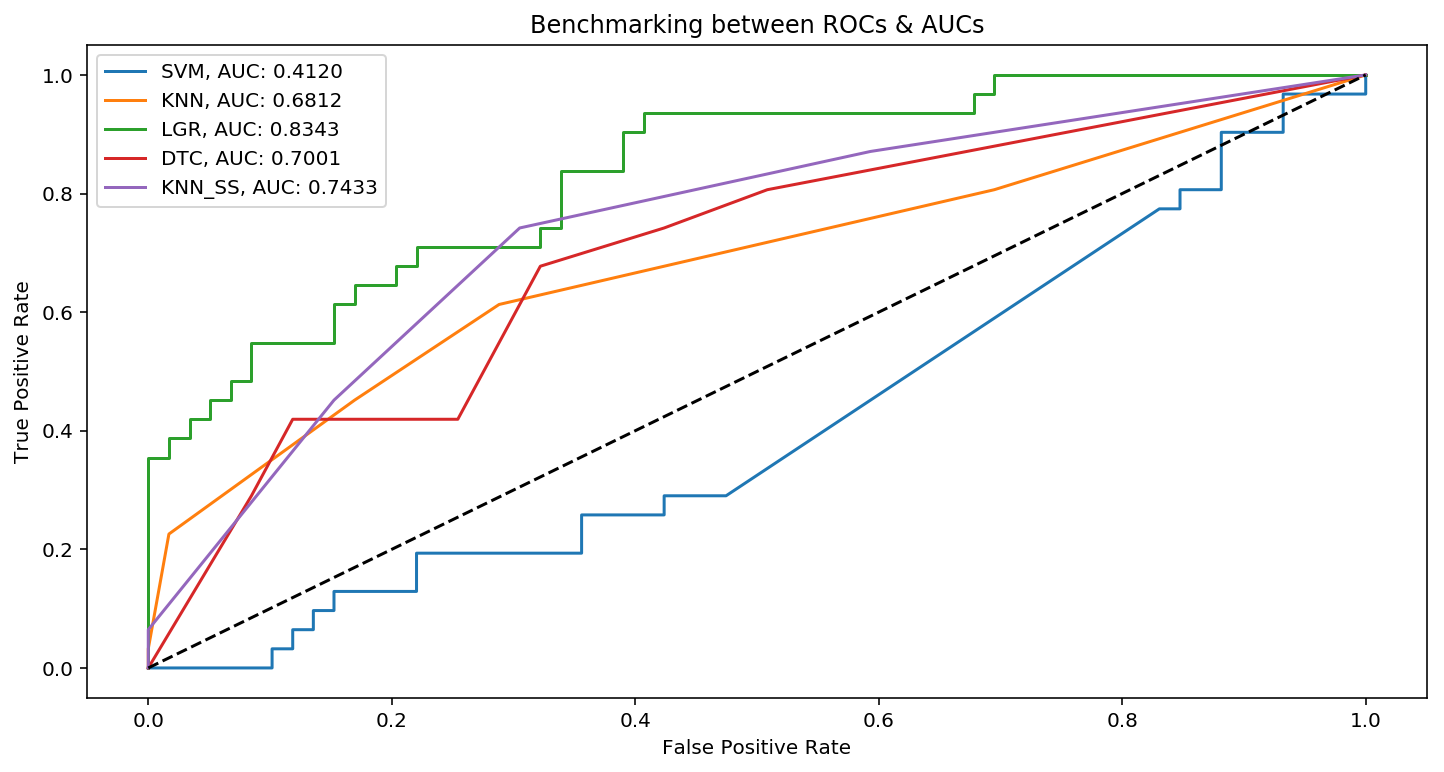

In [353]:
from sklearn.metrics import auc
for label,y_pred_prob in zip(["SVM","KNN","LGR","DTC","KNN_SS"],
                    [y_pred_prob_svm,y_pred_prob_knn,y_pred_prob_lgr,y_pred_prob_dtc,y_pred_prob_knn_ss]):
    fpr,tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr,label=label+str(", AUC: %.4f"%auc(fpr,tpr)))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('Benchmarking between ROCs & AUCs')
plt.savefig('snapshot/global_benchmarking',bbox_inches='tight',dpi=100);

# KNN SELECTED

train_sizes: [ 24  39  54  70  85 101 116 132 147 162 178 193 209 224 240]


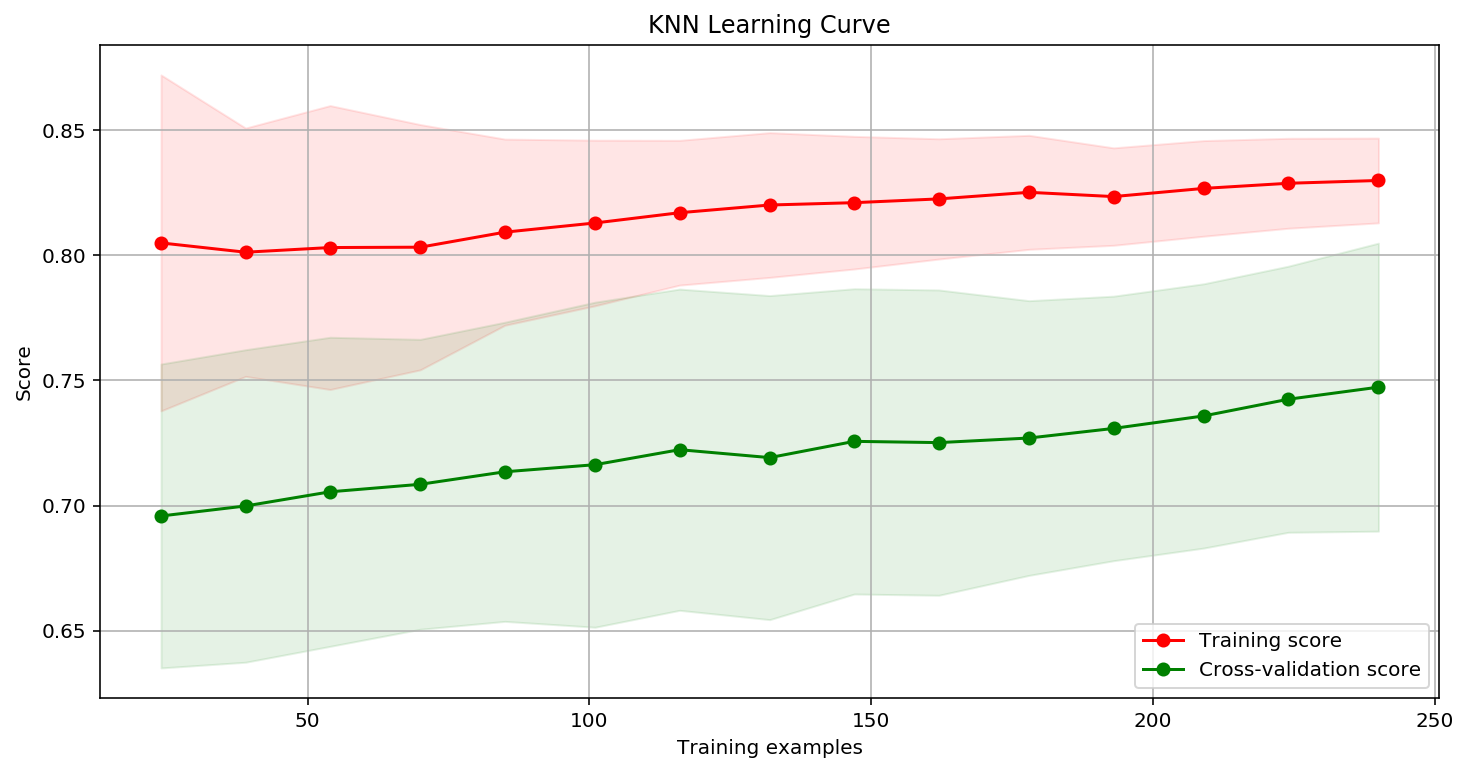

In [354]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
plt.figure()
plt.title("KNN-6 Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
cv = ShuffleSplit(n_splits=100, test_size=0.2)
train_sizes, train_scores, test_scores = learning_curve(
    knn_standar_scale, X, y, cv=cv, n_jobs=3, train_sizes=np.linspace(.1, 1.0, 15))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()
print('train_sizes:',train_sizes)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="lower right")
plt.savefig('snapshot/global_knn6_learning_curve',bbox_inches='tight',dpi=100);

In [355]:
knn_standar_scale.get_params()

{'memory': None,
 'steps': [('imputer',
   Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)),
  ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
              metric_params=None, n_jobs=None, n_neighbors=5, p=2,
              weights='uniform'))],
 'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0),
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
            metric_params=None, n_jobs=None, n_neighbors=5, p=2,
            weights='uniform'),
 'imputer__axis': 0,
 'imputer__copy': True,
 'imputer__missing_values': 'NaN',
 'imputer__strategy': 'mean',
 'imputer__verbose': 0,
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'm

[0.861      0.81583333 0.82720833 0.804875   0.815      0.79220833
 0.8035     0.779625   0.791375   0.772625   0.783625   0.774375  ] [0.01363614 0.01378153 0.01363532 0.0139699  0.0155568  0.01611218
 0.01513504 0.01406699 0.01268276 0.01515264 0.01547012 0.01505055]


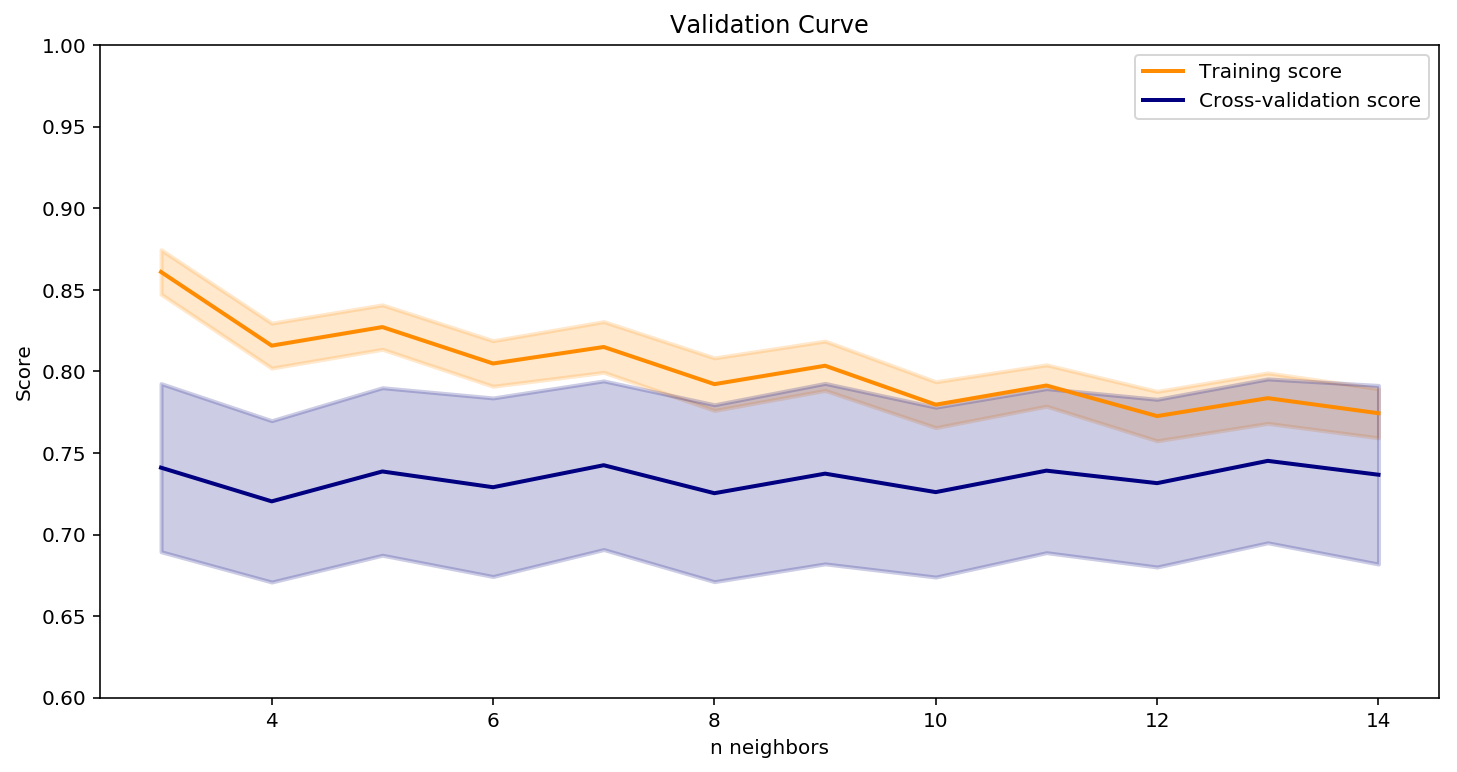

In [356]:
param_range = np.linspace(3,14,12,dtype=int)
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    knn_standar_scale, X, y, param_name="knn__n_neighbors", param_range=param_range,
    cv=cv, scoring="accuracy", n_jobs=3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("KNN-6 Validation Curve")
plt.xlabel("n neighbors")
plt.ylabel("Score")
plt.ylim(.6, 1)
lw = 2
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
print(train_scores_mean, train_scores_std)
plt.legend(loc="best")
plt.savefig('snapshot/global_knn6_validation_curve',bbox_inches='tight',dpi=100);

In [357]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier())])
parameters = {'knn__n_neighbors':[3,4,5,6,7]}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print('KNeighbors classifier - Classification Report: \n',classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

KNeighbors classifier - Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.86      0.82        59
           1       0.67      0.52      0.58        31

   micro avg       0.74      0.74      0.74        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.74      0.74      0.74        90

Best Parameters: {'knn__n_neighbors': 3}
Best Accuracy: 0.7333
Test Accuracy: 0.7444


In [358]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('SVM', SVC())])
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1,0.01, 0.001]}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print('Support Vector Classification - Classification Report: \n',classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

Support Vector Classification - Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        59
           1       0.72      0.58      0.64        31

   micro avg       0.78      0.78      0.78        90
   macro avg       0.76      0.73      0.74        90
weighted avg       0.77      0.78      0.77        90

Best Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}
Best Accuracy: 0.7714
Test Accuracy: 0.7778


In [359]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('lgr', LogisticRegression())])
parameters = {'lgr__C':[1, 10, 100],
              'lgr__penalty':['l1', 'l2']}

cv = GridSearchCV(pipeline,param_grid=parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print('Logistic regression Classification Report: \n',classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

Logistic regression Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.77      0.55      0.64        31

   micro avg       0.79      0.79      0.79        90
   macro avg       0.78      0.73      0.75        90
weighted avg       0.79      0.79      0.78        90

Best Parameters: {'lgr__C': 1, 'lgr__penalty': 'l1'}
Best Accuracy: 0.7571
Test Accuracy: 0.7889


In [360]:
pipeline = Pipeline([('imputer',imp),
                     ('scaler', StandardScaler()), 
                     ('tree', DecisionTreeClassifier())])
parameters = {"tree__max_depth": [3,5,7, None],
              "tree__max_features": randint(1, 9),
              "tree__min_samples_leaf": randint(1, 9),
              "tree__criterion": ["gini", "entropy"]}

cv = RandomizedSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print('Decision tree classifier Callasification Report: \n',classification_report(y_test, y_pred))
print("Best Parameters: %s"%cv.best_params_)
print("Best Accuracy: %.4f"%cv.best_score_)
print("Test Accuracy: %.4f"%cv.score(X_test, y_test))

Decision tree classifier Callasification Report: 
               precision    recall  f1-score   support

           0       0.73      0.73      0.73        59
           1       0.48      0.48      0.48        31

   micro avg       0.64      0.64      0.64        90
   macro avg       0.61      0.61      0.61        90
weighted avg       0.64      0.64      0.64        90

Best Parameters: {'tree__criterion': 'gini', 'tree__max_depth': 5, 'tree__max_features': 8, 'tree__min_samples_leaf': 4}
Best Accuracy: 0.7619
Test Accuracy: 0.6444


In [361]:
X = df_global_dummy.drop(['esperanza_vida'], axis=1)
y = df_global_dummy['esperanza_vida']

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

In [363]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('elasticnet', ElasticNet())])

parameters = {"elasticnet__l1_ratio": np.linspace(0.1,0.9,9),
              "elasticnet__normalize": [True,False],
              "elasticnet__selection": ['cyclic','random']}

cv = GridSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Best Parameters: %s"%cv.best_params_)
print("Best R^2: %.4f"%cv.best_score_)
print("Test R^2: %.4f"%cv.score(X_test, y_test))

Best Parameters: {'elasticnet__l1_ratio': 0.9, 'elasticnet__normalize': False, 'elasticnet__selection': 'cyclic'}
Best R^2: 0.1809
Test R^2: 0.3212


In [364]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('lasso', Lasso())])

parameters = {"lasso__alpha": np.linspace(-0.5,0.5,20),
              "lasso__normalize": [True,False],
              "lasso__selection": ['cyclic','random']}

cv = GridSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Best Parameters: %s"%cv.best_params_)
print("Best R^2: %.4f"%cv.best_score_)
print("Test R^2: %.4f"%cv.score(X_test, y_test))

Best Parameters: {'lasso__alpha': 0.39473684210526305, 'lasso__normalize': True, 'lasso__selection': 'cyclic'}
Best R^2: 0.2985
Test R^2: 0.2227


In [365]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('ridge', Ridge())])

parameters = {"ridge__alpha": np.linspace(-1,1,20),
              "ridge__normalize": [True,False]}

cv = GridSearchCV(pipeline,parameters)
cv.fit(X_train,y_train)
y_pred = cv.predict(X_test)

print("Best Parameters: %s"%cv.best_params_)
print("Best R^2: {}".format(cv.best_score_))
print("Test R^2: %.4f"%cv.score(X_test, y_test))

Best Parameters: {'ridge__alpha': 1.0, 'ridge__normalize': True}
Best R^2: 0.1444651029422469
Test R^2: 0.3268
